# Bike Sharing Assignment

**Problem Statement**

>The objective is to model the demand for shared bikes with the available independent variables

**Approach**
- **Data Understanding** - Getting insight on the dataset provided and its variables along with the nature of data
- **Data Cleaning** - Data that cannot be utilized to be cleaned by removing null columns and rows that can be removed safely.
- **Data Handling** - Data type conversion and changing the values to usable form
- **Data Analysis** - Performing Univariate, Bivariate and Multivariate analysis
- **Model Building** - Model to be built using correct parameters and tuning
- **Residual Analysis** - Residual Analysis to be performed after building model to validate the assumptions
- **Model Prediction** - Performing prediction using test data set
- **Model Evaluation** - Model to be evaluated for the usage of principles and metrics


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
day_df = pd.read_csv("day.csv")

### Step 1 - Data Understanding

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Data Dictionary:**
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [6]:
day_df.shape

(730, 16)

**Observation:**
- 16 columns are present
- 730 rows are present
- all of the columns are having non-null data
- Data type of the columns except dteday are appropriate

### Step 2 - Data Cleaning

**Drop Columns that are not meaningful for analysis**

Criteria for Dropping columns as below.
1. Any column that has the same value throught all rows can be dropped since it does not add value
2. Any column that does not provide any insight that is related to analysis
3. Dropping columns that are part of dependent variables.

There are no columns with unique values

In [7]:
for column in day_df.columns:
    if(day_df[column].unique().size==1):
        print(column,",",day_df[column].unique()[0])

Dropping instant since it is just row index and does not add any value to the analysis

In [8]:
day_df.drop(['instant'],axis=1, inplace=True)

Dropping columns part of dependent variable cnt

In [9]:
day_df.drop(['casual','registered'],axis=1, inplace=True)

In [10]:
day_df.drop(['dteday'],axis=1, inplace=True)

**Checking for Outliers**

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


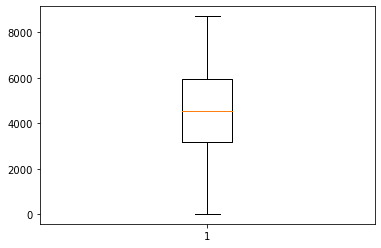

In [11]:
#Checking for outliers in target variable
plt_data=day_df['cnt']
plt.boxplot(plt_data)
print(plt_data.describe())
plt.show()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


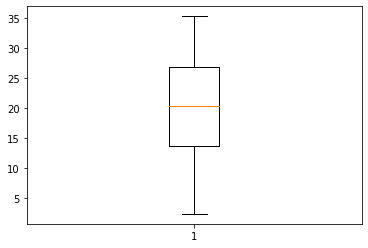

In [12]:
#Checking for outliers in temp
plt_data=day_df['temp']
plt.boxplot(plt_data)
print(plt_data.describe())
plt.show()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


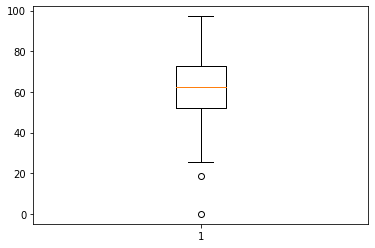

In [13]:
#Checking for outliers in temp
plt_data=day_df['hum']
plt.boxplot(plt_data)
print(plt_data.describe())
plt.show()

Zero humidity is not possible and can be considered as outlier and removed from dataset

In [14]:
day_df=day_df[day_df['hum']>0]

In [15]:
day_df.shape

(729, 12)

count    729.000000
mean      12.757060
std        5.196382
min        1.500244
25%        9.041650
50%       12.125325
75%       15.624936
max       34.000021
Name: windspeed, dtype: float64


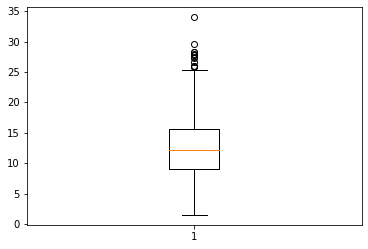

In [16]:
#Checking for outliers in windspeed
plt_data=day_df['windspeed']
plt.boxplot(plt_data)
print(plt_data.describe())
plt.show()

Removing the max outlier in windspeed

In [17]:
day_df=day_df[day_df['windspeed']<34.000021]

In [18]:
day_df.shape

(728, 12)

**Observation:**
- 2 outliers each in humidity and windspeed are removed

### Step 3 - Data Handling

In [19]:
import calendar
def prepareData(df):
    
    #Converting season from numeric category to string category since it will be helpful when creating ONE-HOT encoding
    df['season']=df['season'].map({1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'})
    
    #converting mnth to text
    df['mnth']=df['mnth'].apply(lambda x : calendar.month_abbr[x])
    
    #converting day of the week from numeric to string
    df['weekday']=df['weekday'].map({0:"Sun", 1:"Mon", 2:"Tue", 3: "Wed", 4: "Thu", 5:"Fri", 6:"Sat"})
    
    #converting weather from numeric to string
    df['weathersit']=df['weathersit'].map({1:'Clear', 2 :'Mist_Cloudy', 3 :'Light_Rain_Snow', 4:'Heavy_Rain_Icey'})
    
    return df

In [20]:
day_df=prepareData(day_df)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4 - Data Analysis

In [21]:
#import necessary libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [22]:
plt.style.use('ggplot')

**Checking Correlation of the variables**

In [23]:
df_corr = day_df.corr()
round(df_corr, 2)

corr_list = df_corr.unstack()
print(corr_list.sort_values(ascending=False).drop_duplicates().head(11))

yr          yr       1.000000
temp        atemp    0.991691
atemp       cnt      0.631090
cnt         temp     0.627321
            yr       0.568147
atemp       hum      0.138888
hum         temp     0.125376
workingday  cnt      0.061794
            temp     0.053068
            atemp    0.052535
yr          temp     0.047351
dtype: float64


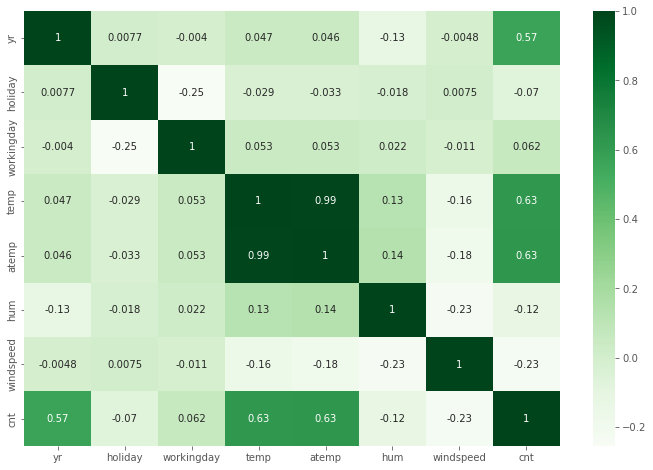

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True,cmap='Greens')
plt.show()

**Observation:**
- temp is highly correlated with atemp hence advised to drop atemp
- temp and atemp are highly correlated with the target variable cnt
- yr is highly correlated with target variable cnt
- windspeed is negatively correlated with cnt
- humidity as well negatively corelated with cnt

In [25]:
day_df.drop(['atemp'],axis=1, inplace=True)

**Visualizing the variables**

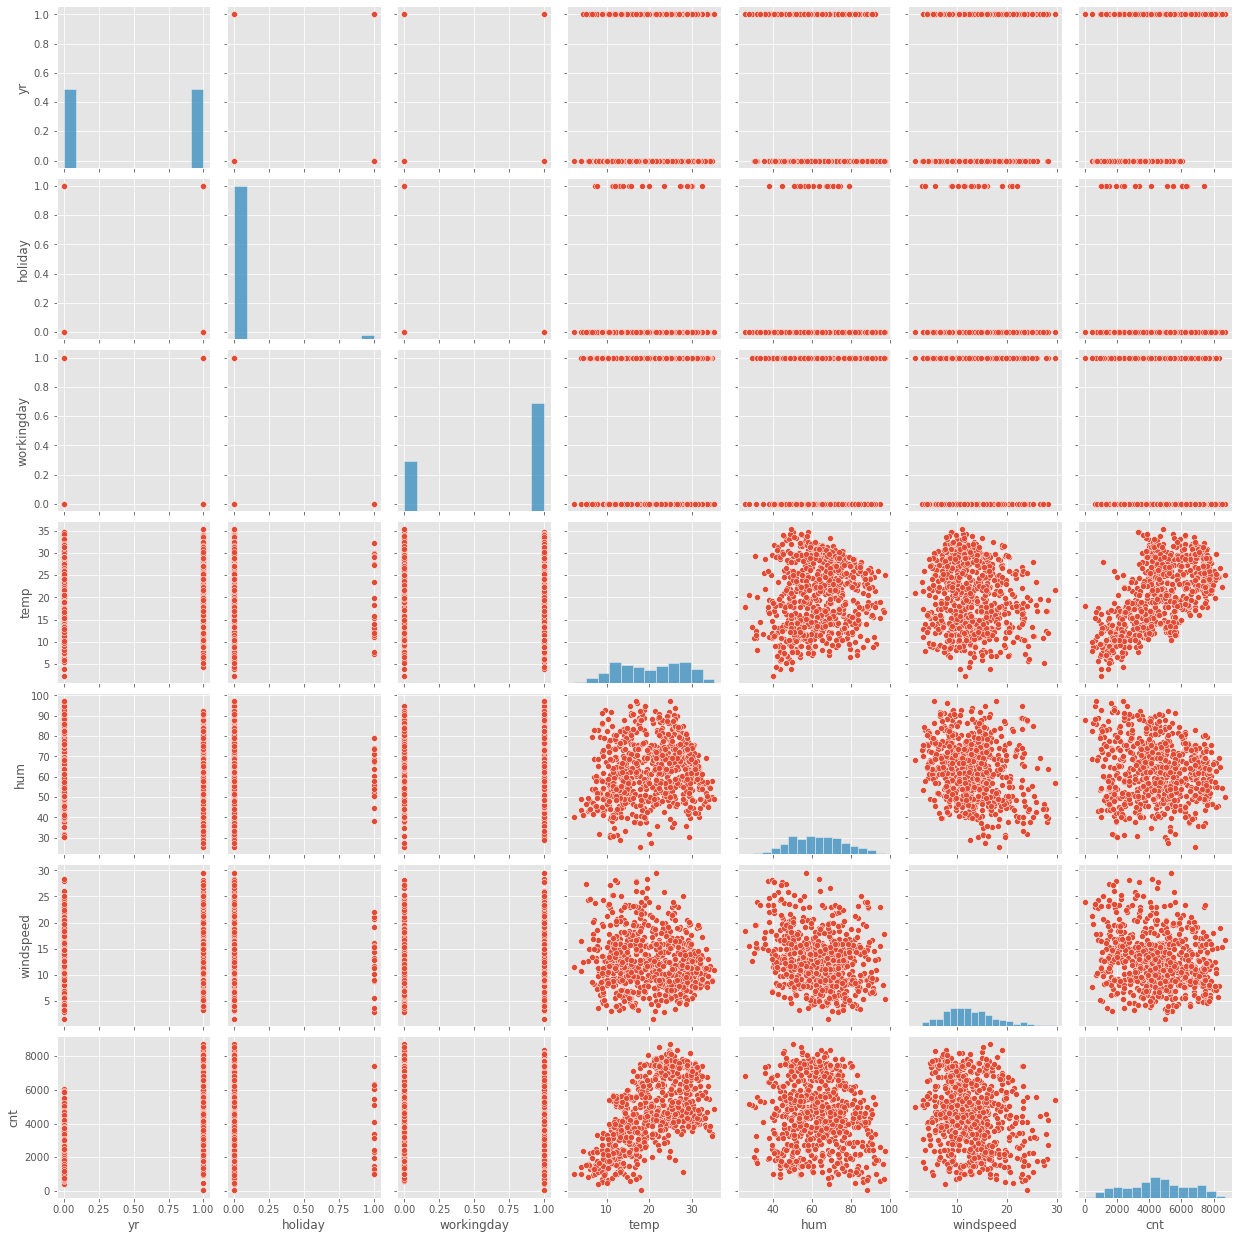

In [26]:
sns.pairplot(day_df)
plt.show()

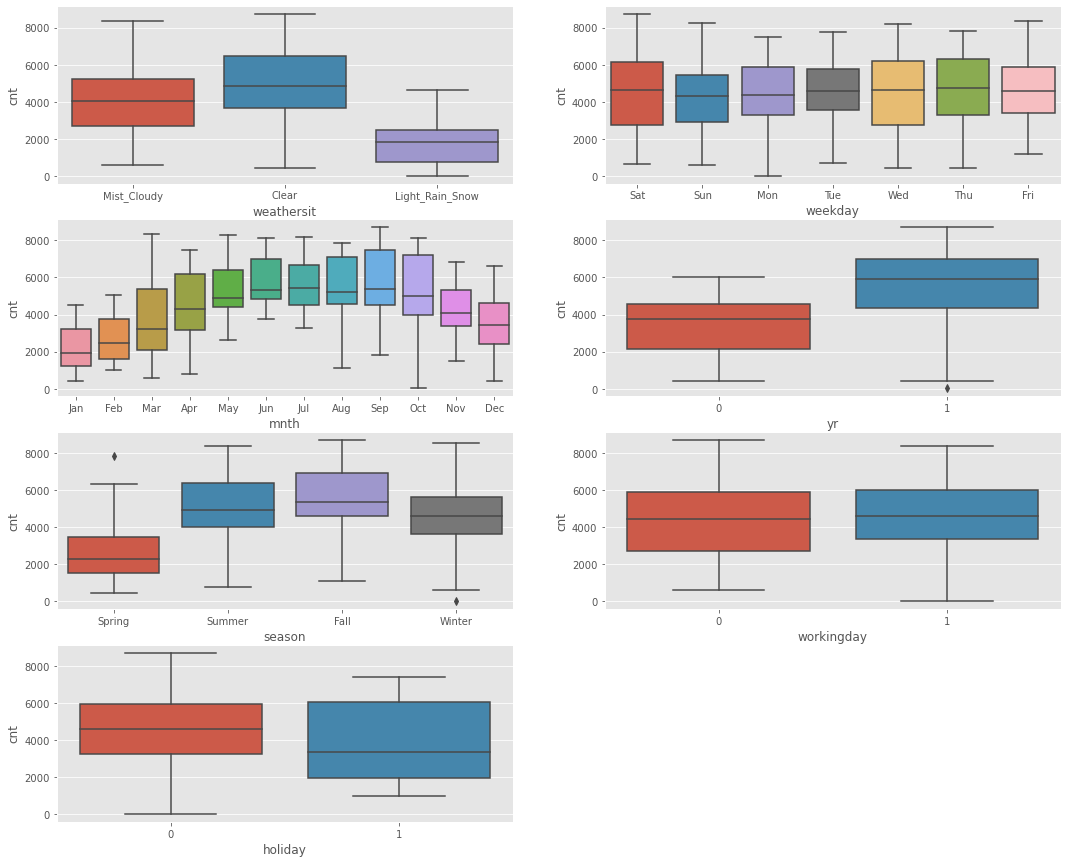

In [27]:
plt.figure(figsize=(18, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)
plt.show()

**Observation:**
- Clear weather has more positive impact towards cnt
- Day of the week has very minimal variations across the 7 days
- cnt gradually increases as calendar month increases and after mid year seems to be reduction in cnt
- year on year increase between 2018 and 2019 is increasing trend
- Spring has the lowes demand for cnt and Fall has the highest demand
- Working day and holiday has very minimal variations

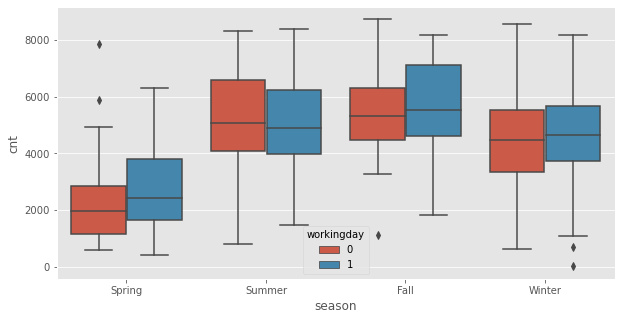

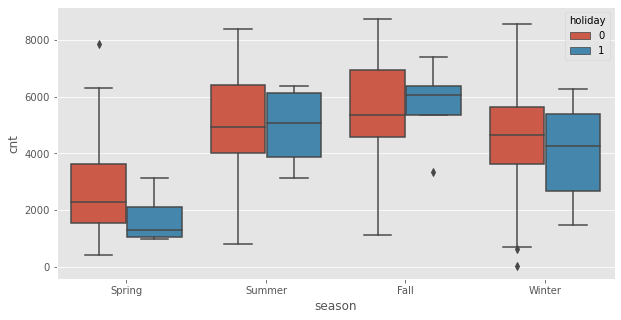

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = day_df)
plt.show()
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = day_df)
plt.show()

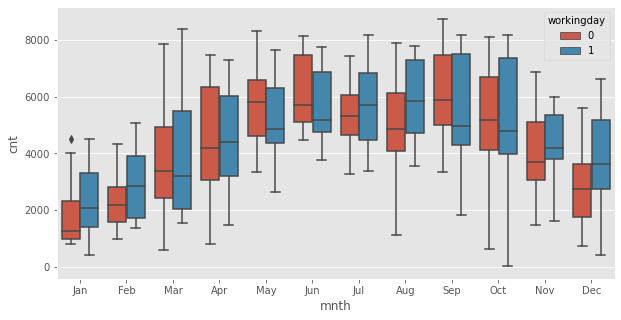

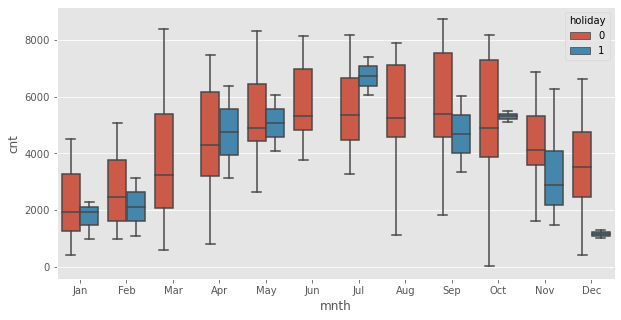

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = day_df)
plt.show()
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = day_df)
plt.show()

**Observation:**
- Seems non-holiday consitently has more cnt than holiday

### Step 5 - Model Building

In [30]:
from sklearn.preprocessing import MinMaxScaler
def encodeData(df):
    
    #creating dummy columns for month, weekday, season and weather situation
    dummy_vars = df[['mnth','weekday','season','weathersit']]
    dummy=pd.get_dummies(dummy_vars, drop_first = True)
    df=pd.concat([dummy,df], axis=1)
    df.drop(['mnth','weekday','season','weathersit'], axis=1, inplace=True)
    
    scaler = MinMaxScaler()
    # Apply scaler() to all the columns except the 'binary' and 'dummy' variables
    num_vars = ['cnt', 'hum', 'windspeed', 'temp']
    df[num_vars] = scaler.fit_transform(df[num_vars])
    
    return df

In [31]:
day_df=encodeData(day_df)
day_df.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_Winter,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.355170,0.767981,0.329351,0.110792
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.379232,0.615202,0.539510,0.089623
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.171000,0.254904,0.538962,0.152669
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.175530,0.468123,0.328993,0.177174
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.209120,0.254464,0.392461,0.181546


### Splitting data into train set and test set

In [32]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model using statsmodel

#### Model - 1

In [34]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [35]:
# Check the parameters obtained

lr.params

const    0.162791
temp     0.651120
dtype: float64

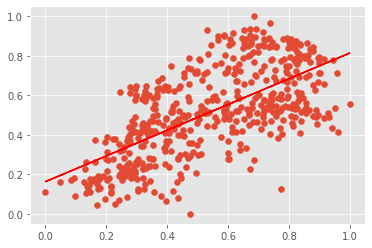

In [36]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.651*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [37]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     386.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.40e-64
Time:                        15:42:00   Log-Likelihood:                 183.56
No. Observations:                 509   AIC:                            -363.1
Df Residuals:                     507   BIC:                            -354.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1628      0.019      8.430      0.0

**Observation:**
- R-Squared obtained is 0.432 which is bit low.
- adding the next highly correlated variable yr

#### Model - 2

In [38]:
X_train_lm = sm.add_constant(X_train[['temp', 'yr']])
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072296
temp     0.601586
yr       0.231029
dtype: float64

In [39]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     579.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.55e-131
Time:                        15:42:00   Log-Likelihood:                 342.41
No. Observations:                 509   AIC:                            -678.8
Df Residuals:                     506   BIC:                            -666.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0723      0.015      4.887      0.0

**Observation:**
- R-squared value is 0.696 with 2 variables
- adding all variables except dummy vars in the next model

#### Model - 3

In [40]:
X_train_lm = sm.add_constant(X_train[['temp', 'yr', 'hum', 'windspeed', 'holiday', 'workingday']])
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.269347
temp          0.594757
yr            0.220834
hum          -0.205708
windspeed    -0.210844
holiday      -0.059347
workingday    0.011732
dtype: float64

In [41]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     248.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.10e-147
Time:                        15:42:00   Log-Likelihood:                 390.32
No. Observations:                 509   AIC:                            -766.6
Df Residuals:                     502   BIC:                            -737.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2693      0.026     10.503      0.0

**Observation:**
- R-squared is 0.75 which is good considering dummy variables has not been included in these models

### Building Model using SK learn and RFE

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [43]:
#method to check VIF of dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif=pd.DataFrame()
    vif['features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by="VIF", ascending=False)
    print(vif)

#### Model - 4

In [44]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,20)

In [45]:
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 8),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('weathersit_Light_Rain_Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [46]:
rfe_cols=X_train.columns[rfe.support_]
X_train_rfe=X_train[rfe_cols]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.params


const                         0.240884
mnth_Dec                     -0.025744
mnth_Jan                     -0.021624
mnth_Jul                     -0.061004
mnth_Mar                      0.037497
mnth_May                      0.040458
mnth_Nov                     -0.042025
mnth_Sep                      0.072745
weekday_Mon                  -0.023576
weekday_Sat                   0.089786
weekday_Sun                   0.039696
season_Spring                -0.109584
season_Winter                 0.076594
weathersit_Light_Rain_Snow   -0.226562
weathersit_Mist_Cloudy       -0.050863
yr                            0.224873
holiday                       0.029989
workingday                    0.081413
temp                          0.465695
hum                          -0.143414
windspeed                    -0.136033
dtype: float64

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.08e-190
Time:                        15:42:01   Log-Likelihood:                 529.32
No. Observations:                 509   AIC:                            -1019.
Df Residuals:                     489   BIC:                            -934.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2409      0.022     10.960      0.000       0.198       0.284
mnth_Dec                      -0.0257      0.017     -1.544      0.123      -0.058       0.007
mnth_Jan                      -0.0216      0.019     -1.168      0.243      -0.058       0.015
mnth_Jul                      -0.0610      0.017     -3.546      0.000      -0.095      -0.027
mnth_Mar                       0.0375      0.016      2.310      0.021       0.006       0.069
mnth_May                       0.0405      0.015      2.628      0.009       0.010       0.071
mnth_Nov                      -0.0420      0.018     -2.346      0.019      -0.077      -0.007
mnth_Sep                       0.0727      0.015      4.701      0.000       0.042       0.103
weekday_Mon                   -0.0236      0.012     -1.993      0.047      -0.047      -0.000
weekday_Sat                    0.0898      0.011      8.050      0.000       0.068       0.112
weekday_Sun                    0.0397      0.011      3.582      0.000       0.018       0.061
season_Spring                 -0.1096      0.016     -6.891      0.000      -0.141      -0.078
season_Winter                  0.0766      0.014      5.439      0.000       0.049       0.104
weathersit_Light_Rain_Snow    -0.2266      0.027     -8.414      0.000      -0.279      -0.174
weathersit_Mist_Cloudy        -0.0509      0.011     -4.802      0.000      -0.072      -0.030
yr                             0.2249      0.008     28.254      0.000       0.209       0.241
holiday                        0.0300      0.020      1.480      0.140      -0.010       0.070
workingday                     0.0814      0.008      9.644      0.000       0.065       0.098
temp                           0.4657      0.033     14.318      0.000       0.402       0.530
hum                           -0.1434      0.029     -4.900      0.000      -0.201      -0.086
windspeed                     -0.1360      0.023     -6.001      0.000      -0.181      -0.091
==============================================================================
Omnibus:                       99.879   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.393
Skew:                          -0.905   Prob(JB):                     1.98e-69
Kurtosis:                       6.413   Cond. No.                     4.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
checkVIF(X_train_rfe)

                      features   VIF
10                 weekday_Sun   inf
17                  workingday   inf
9                  weekday_Sat   inf
16                     holiday   inf
18                        temp  3.62
11               season_Spring  3.10
12               season_Winter  2.51
19                         hum  2.26
2                     mnth_Jan  1.85
6                     mnth_Nov  1.76
14      weathersit_Mist_Cloudy  1.73
1                     mnth_Dec  1.53
13  weathersit_Light_Rain_Snow  1.48
3                     mnth_Jul  1.40
4                     mnth_Mar  1.33
5                     mnth_May  1.28
8                  weekday_Mon  1.24
20                   windspeed  1.19
7                     mnth_Sep  1.19
15                          yr  1.06
0                        const  0.00


**Observation:**
- VIF and P-values are very erratic with top 20 variables hence reducing the next model to top 15 variables

#### Model - 5

In [49]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('mnth_Aug', False, 10),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 13),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('weathersit_Light_Rain_Snow', True, 1),
 ('weathersit_Mist_Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [50]:
rfe_cols=X_train.columns[rfe.support_]
X_train_rfe=X_train[rfe_cols]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.params

const                         0.223657
mnth_Jul                     -0.073017
mnth_Mar                      0.043176
mnth_Sep                      0.069462
weekday_Sat                   0.090305
weekday_Sun                   0.043260
season_Spring                -0.119573
season_Winter                 0.052355
weathersit_Light_Rain_Snow   -0.227863
weathersit_Mist_Cloudy       -0.048593
yr                            0.223546
holiday                       0.010779
workingday                    0.079313
temp                          0.493005
hum                          -0.136126
windspeed                    -0.133215
dtype: float64

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.68e-192
Time:                        15:42:01   Log-Likelihood:                 519.96
No. Observations:                 509   AIC:                            -1010.
Df Residuals:                     494   BIC:                            -946.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2237      0.021     10.595      0.000       0.182       0.265
mnth_Jul                      -0.0730      0.017     -4.285      0.000      -0.106      -0.040
mnth_Mar                       0.0432      0.015      2.863      0.004       0.014       0.073
mnth_Sep                       0.0695      0.015      4.570      0.000       0.040       0.099
weekday_Sat                    0.0903      0.011      8.317      0.000       0.069       0.112
weekday_Sun                    0.0433      0.011      3.977      0.000       0.022       0.065
season_Spring                 -0.1196      0.015     -8.029      0.000      -0.149      -0.090
season_Winter                  0.0524      0.012      4.330      0.000       0.029       0.076
weathersit_Light_Rain_Snow    -0.2279      0.027     -8.442      0.000      -0.281      -0.175
weathersit_Mist_Cloudy        -0.0486      0.011     -4.569      0.000      -0.069      -0.028
yr                             0.2235      0.008     27.775      0.000       0.208       0.239
holiday                        0.0108      0.019      0.573      0.567      -0.026       0.048
workingday                     0.0793      0.008      9.495      0.000       0.063       0.096
temp                           0.4930      0.030     16.268      0.000       0.433       0.553
hum                           -0.1361      0.029     -4.727      0.000      -0.193      -0.080
windspeed                     -0.1332      0.023     -5.808      0.000      -0.178      -0.088
==============================================================================
Omnibus:                       84.660   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.498
Skew:                          -0.820   Prob(JB):                     6.56e-50
Kurtosis:                       5.826   Cond. No.                     3.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
checkVIF(X_train_rfe)

                      features   VIF
4                  weekday_Sat   inf
5                  weekday_Sun   inf
11                     holiday   inf
12                  workingday   inf
13                        temp  3.06
6                season_Spring  2.65
14                         hum  2.13
7                season_Winter  1.80
9       weathersit_Mist_Cloudy  1.70
8   weathersit_Light_Rain_Snow  1.44
1                     mnth_Jul  1.34
15                   windspeed  1.19
2                     mnth_Mar  1.12
3                     mnth_Sep  1.11
10                          yr  1.05
0                        const  0.00


**Observation:**
- Holiday has high p-value hence dropping it

#### Model - 6

In [53]:
X_train_rfe=X_train_rfe.drop(['holiday'], axis=1)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.params

const                         0.234436
mnth_Jul                     -0.073017
mnth_Mar                      0.043176
mnth_Sep                      0.069462
weekday_Sat                   0.079526
weekday_Sun                   0.032482
season_Spring                -0.119573
season_Winter                 0.052355
weathersit_Light_Rain_Snow   -0.227863
weathersit_Mist_Cloudy       -0.048593
yr                            0.223546
workingday                    0.068534
temp                          0.493005
hum                          -0.136126
windspeed                    -0.133215
dtype: float64

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.68e-192
Time:                        15:42:01   Log-Likelihood:                 519.96
No. Observations:                 509   AIC:                            -1010.
Df Residuals:                     494   BIC:                            -946.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2344      0.034      6.898      0.000       0.168       0.301
mnth_Jul                      -0.0730      0.017     -4.285      0.000      -0.106      -0.040
mnth_Mar                       0.0432      0.015      2.863      0.004       0.014       0.073
mnth_Sep                       0.0695      0.015      4.570      0.000       0.040       0.099
weekday_Sat                    0.0795      0.025      3.242      0.001       0.031       0.128
weekday_Sun                    0.0325      0.024      1.327      0.185      -0.016       0.081
season_Spring                 -0.1196      0.015     -8.029      0.000      -0.149      -0.090
season_Winter                  0.0524      0.012      4.330      0.000       0.029       0.076
weathersit_Light_Rain_Snow    -0.2279      0.027     -8.442      0.000      -0.281      -0.175
weathersit_Mist_Cloudy        -0.0486      0.011     -4.569      0.000      -0.069      -0.028
yr                             0.2235      0.008     27.775      0.000       0.208       0.239
workingday                     0.0685      0.023      3.011      0.003       0.024       0.113
temp                           0.4930      0.030     16.268      0.000       0.433       0.553
hum                           -0.1361      0.029     -4.727      0.000      -0.193      -0.080
windspeed                     -0.1332      0.023     -5.808      0.000      -0.178      -0.088
==============================================================================
Omnibus:                       84.660   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.498
Skew:                          -0.820   Prob(JB):                     6.56e-50
Kurtosis:                       5.826   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
checkVIF(X_train_rfe)

                      features    VIF
0                        const  75.18
11                  workingday   7.34
5                  weekday_Sun   4.85
4                  weekday_Sat   4.81
12                        temp   3.06
6                season_Spring   2.65
13                         hum   2.13
7                season_Winter   1.80
9       weathersit_Mist_Cloudy   1.70
8   weathersit_Light_Rain_Snow   1.44
1                     mnth_Jul   1.34
14                   windspeed   1.19
2                     mnth_Mar   1.12
3                     mnth_Sep   1.11
10                          yr   1.05


**Observation:**
- Dropping the column weekday_Sun which is having high p-value as well as near high VIF.

#### Model - 7

In [56]:
X_train_rfe=X_train_rfe.drop(['weekday_Sun'], axis=1)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.params

const                         0.261533
mnth_Jul                     -0.072621
mnth_Mar                      0.044205
mnth_Sep                      0.068851
weekday_Sat                   0.052762
season_Spring                -0.120673
season_Winter                 0.051971
weathersit_Light_Rain_Snow   -0.227543
weathersit_Mist_Cloudy       -0.048535
yr                            0.223666
workingday                    0.041769
temp                          0.492487
hum                          -0.135959
windspeed                    -0.133087
dtype: float64

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          5.94e-193
Time:                        15:42:01   Log-Likelihood:                 519.06
No. Observations:                 509   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -950.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2615      0.027      9.619      0.000       0.208       0.315
mnth_Jul                      -0.0726      0.017     -4.259      0.000      -0.106      -0.039
mnth_Mar                       0.0442      0.015      2.933      0.004       0.015       0.074
mnth_Sep                       0.0689      0.015      4.529      0.000       0.039       0.099
weekday_Sat                    0.0528      0.014      3.778      0.000       0.025       0.080
season_Spring                 -0.1207      0.015     -8.110      0.000      -0.150      -0.091
season_Winter                  0.0520      0.012      4.296      0.000       0.028       0.076
weathersit_Light_Rain_Snow    -0.2275      0.027     -8.424      0.000      -0.281      -0.174
weathersit_Mist_Cloudy        -0.0485      0.011     -4.560      0.000      -0.069      -0.028
yr                             0.2237      0.008     27.770      0.000       0.208       0.239
workingday                     0.0418      0.011      3.954      0.000       0.021       0.063
temp                           0.4925      0.030     16.239      0.000       0.433       0.552
hum                           -0.1360      0.029     -4.717      0.000      -0.193      -0.079
windspeed                     -0.1331      0.023     -5.798      0.000      -0.178      -0.088
==============================================================================
Omnibus:                       88.329   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.252
Skew:                          -0.851   Prob(JB):                     1.11e-52
Kurtosis:                       5.896   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
checkVIF(X_train_rfe)

                      features    VIF
0                        const  48.04
11                        temp   3.06
5                season_Spring   2.64
12                         hum   2.13
6                season_Winter   1.80
8       weathersit_Mist_Cloudy   1.70
10                  workingday   1.58
4                  weekday_Sat   1.56
7   weathersit_Light_Rain_Snow   1.44
1                     mnth_Jul   1.34
13                   windspeed   1.19
2                     mnth_Mar   1.12
3                     mnth_Sep   1.11
9                           yr   1.05


**Observation:**
- All the P-values are almost 0
- All the VIF are below 5
- R-squared value is 0.848 which means around 85% of the variations are explained
- Model-7 can be selected as final model

### Step 6 - Residual Analysis

Text(0.5, 0, 'Errors')

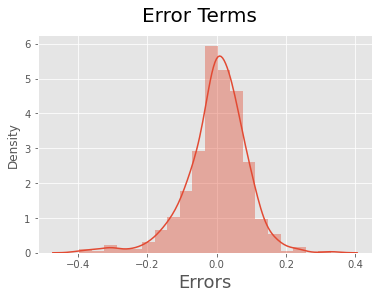

In [59]:
y_train_cnt = lm.predict(X_train_rfe)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 7 - Model Prediction

Test data is already prepared with proper scaling using 30% of the original data set

In [60]:
df_test.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_Winter,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
241,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.722754,0.409512,0.244808,0.596180
496,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.629300,0.314965,0.240334,0.852163
449,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0.481850,0.311485,0.869404,0.636908
594,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.771557,0.486078,0.370911,0.902324
151,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0.878510,0.588746,0.440632,0.454671


In [61]:
## Spitting into X_test and y_test 

y_test=df_test.pop('cnt')
X_test=df_test

In [62]:
#excluding constant column and including only independent variables
X_test_fe=X_test[X_train_rfe.columns[1:]]
X_test_fe.head()

,mnth_Jul,mnth_Mar,mnth_Sep,weekday_Sat,season_Spring,season_Winter,weathersit_Light_Rain_Snow,weathersit_Mist_Cloudy,yr,workingday,temp,hum,windspeed
241,0,0,0,0,0,0,0,0,0,1,0.722754,0.409512,0.244808
496,0,0,0,1,0,0,0,0,1,0,0.629300,0.314965,0.240334
449,0,1,0,0,0,0,0,0,1,1,0.481850,0.311485,0.869404
594,0,0,0,1,0,0,0,0,1,0,0.771557,0.486078,0.370911
151,0,0,0,0,0,0,0,1,0,1,0.878510,0.588746,0.440632


In [63]:
X_test_fe=sm.add_constant(X_test_fe)
y_pred=lm.predict(X_test_fe)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8076577596921345

### Step 7 - Model Evaluation 

Text(0, 0.5, 'y_pred')

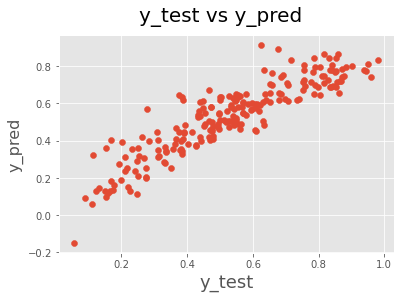

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

We can see that the equation of our best fitted line is:

$ cnt = 0.044 \times mnth_Mar - 0.072 \times mnth_Jul + 0.068 \times mnth_Sep +  0.052 \times weekday_Sat - 0.120 \times season_Spring +  0.051 \times season_Winter - 0.227 \times weathersit_Light_Rain_ - 0.048 \times weathersit_Mist_Cloudy +  0.223 \times yr +  0.041 \times workingday +  0.492 \times temp - 0.135 \times hum - 0.133 \times windspeed $

### Assignment-based Subjective Questions 
1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
- Clear weather has more positive impact towards cnt
- Day of the week has very minimal variations across the 7 days
- cnt gradually increases as calendar month increases and after mid year seems to be reduction in cnt
- year on year increase between 2018 and 2019 is increasing trend
- Spring has the lowes demand for cnt and Fall has the highest demand
- Working day and holiday has very minimal variations
2. Why is it important to use drop_first=True during dummy variable creation?
- Drop first ensures that unnecessary additional dummy column is not created and n-1 columns are created where n is number of levels.
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
- temp variable is highest correlated with target variable
4. How did you validate the assumptions of Linear Regression after building the model on the training set?
- Major assumption of Linear Regression is error terms are normally distributed which is validated in the python notebook by plotting distplot of residuals which shows normal distribution of error terms.
5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
- temp impacts positively
- Weather Light Rain and Snow impacts negatively
- year impacts postiviely
